In [4]:
###########################################################
# Regression with statsmodel
#with 2 numerical (response and explanatory) variables
###########################################################
import pandas as pd 

taiwan_real_estate = pd.read_csv("datasets/taiwan_real_estate2.csv")
display(taiwan_real_estate.head(5))

#Predicting prices is a common business task, 
#so house price makes a good response variable.


,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


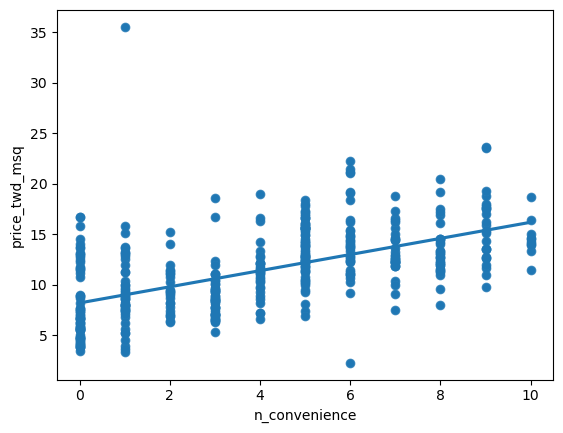

In [11]:
#Before running any statistical models, visualize your dataset
#look at the relationship between house price per area and the number of nearby convenience stores

# Import seaborn with alias sns
import seaborn as sns
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Draw the scatter plot
sns.scatterplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate)

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None)

# Show the plot
plt.show()

#scatter plots are the standard way to visualize the relationship between two numeric variables, 
#and seaborn makes adding linear trend lines easy.


In [12]:
#Linear regression with ols()
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)


Intercept        8.224237
n_convenience    0.798080
dtype: float64


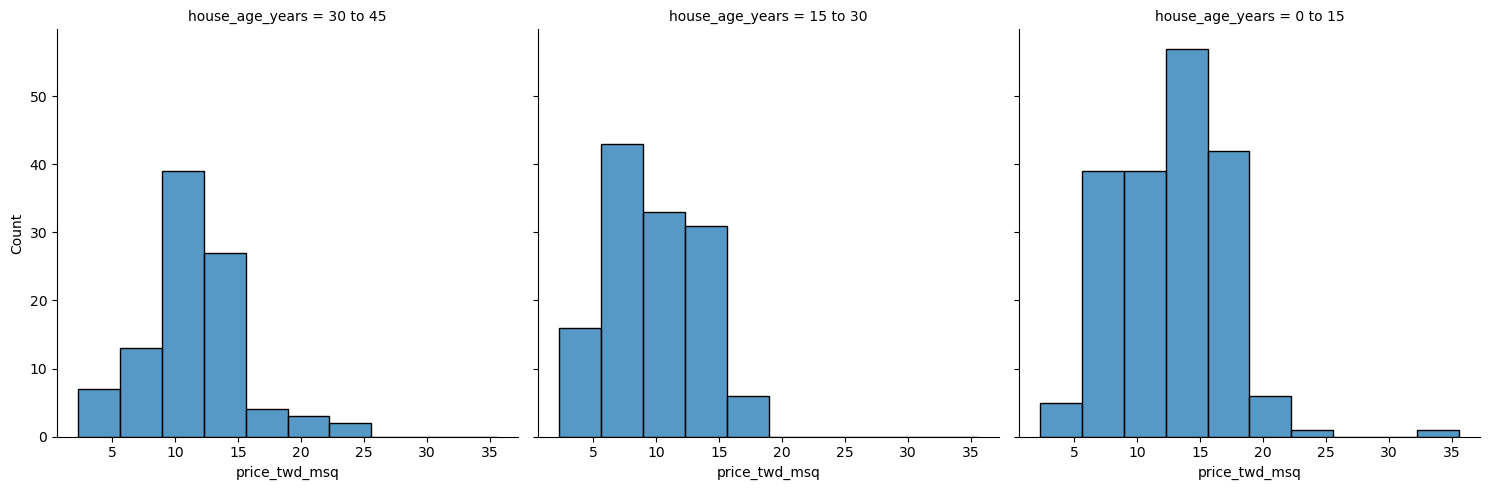

In [13]:
#with categorical explanatory variable
# draw a histogram for each category.
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x="price_twd_msq",
         col="house_age_years",
         bins=10)

# Show the plot
plt.show()

#new houses are the most expensive on average, 
#and the medium aged ones (15 to 30 years) are the cheapest.



In [14]:
#Calculating means by category
#calculate summary statistics for each category to explore categorical variables further.
#calculate the mean and median of the response variable, grouped by a categorical variable. 
#you can compare each category in more detail.

# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
print(mean_price_by_age)


house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [16]:
###########################################################
#Linear regression with a categorical explanatory variable
###########################################################
#the means of each category will also be the coefficients of a linear regression model 
#with one categorical variable.
    
#run a linear regression model with categorical explanatory variables, 
#with the same code as with numeric explanatory variables. 
#The coefficients returned by the model are different.

# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)


# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years +0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

#The coefficients of the model are just the means of each category calculated previously.


Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64
house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [19]:
######################################
#Predicting house prices
######################################
#the most useful feature of statistical models like linear regression is 
#that you can make predictions. 
#you specify values for each of the explanatory variables, 
#feed them to the model, and get a prediction for the corresponding response variabl

#fitted model
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()

# Import numpy with alias np
import numpy as np

# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
print(explanatory_data)

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
print(price_twd_msq)

# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)
print(prediction_data)

#Having the predictions in a DataFrame will make it easier to visualize them.


    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10
0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64
    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


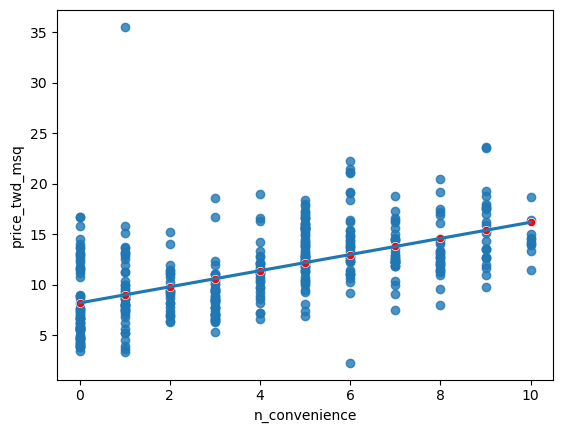

In [21]:
#############################
#Visualizing predictions
#############################
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,color="red")
plt.show()
#Naturally, the predicted points lie on the trend line.


In [23]:
#############################
#The limits of prediction
#Extrapolation
#############################
# test the limits of the model's ability to predict, try some impossible situations.
 
#Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1, 2.5]})

print(mdl_price_vs_conv.predict(impossible))
#the model succesfully gives a prediction for a case impossible in real_life
#Linear models don't know what is possible or not in real life. 
#they can give you predictions that don't make any sense when applied to the data. 
#first understand what your data means in order to determine whether a prediction is nonsense or not.



0     7.426158
1    10.219437
dtype: float64


In [27]:
########################################
#Extracting model elements
########################################

# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

#The model object created by ols() contains many elements. I
#to perform further analysis on the model results, you need to extract them.
#The model coefficients, the fitted values, and the residuals 
#are the most important pieces of the linear model object.

# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())


Intercept        8.224237
n_convenience    0.798080
dtype: float64
0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64
0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           3.41e-37
Time:                        16:08:29   Log-Likelihood:                -1091.1
No. Observations:                 414   

In [28]:
#####################################
#Manually predicting house prices
#####################################
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]
# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = coeffs[0] + coeffs[1] * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto = mdl_price_vs_conv.predict(explanatory_data)))

#For simple linear regression, the prediction just involves one addition and one multiplication.

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


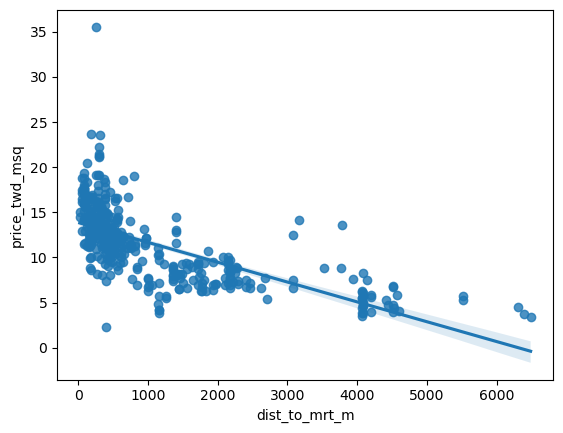

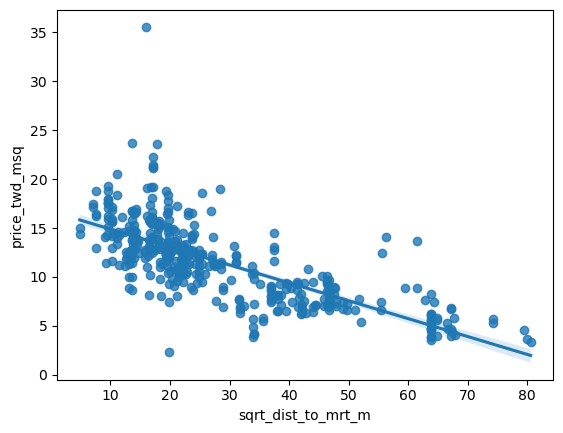

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [44]:
########################################
#Transforming the explanatory variable
########################################
#use the distance to the nearest MRT (metro) station as the explanatory variable. 
#You'll use code to make every commuter's dream come true: 
#shortening the distance to the metro station by taking the square root.
    
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

fig = plt.figure()
# Plot using the transformed variable
sns.regplot(x="dist_to_mrt_m",y="price_twd_msq", data=taiwan_real_estate)
plt.show()
sns.regplot(x="sqrt_dist_to_mrt_m",y="price_twd_msq", data=taiwan_real_estate)
plt.show()    


# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()
print(mdl_price_vs_dist.params)



   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


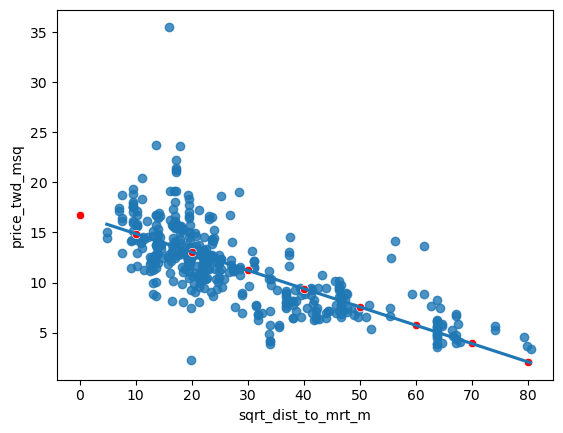

In [40]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)
print(prediction_data)


fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

#By transforming the explanatory variable, 
#the relationship with the response variable became linear, 
#and so a linear regression became an appropriate model.


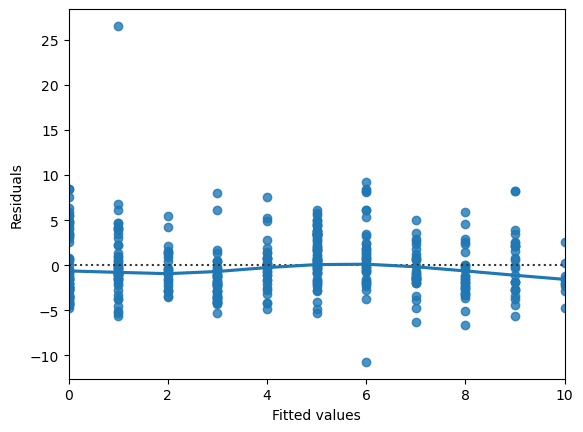

In [45]:
########################################
#Drawing diagnostic plots
## Plot the residuals vs. fitted values
########################################

sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.show()


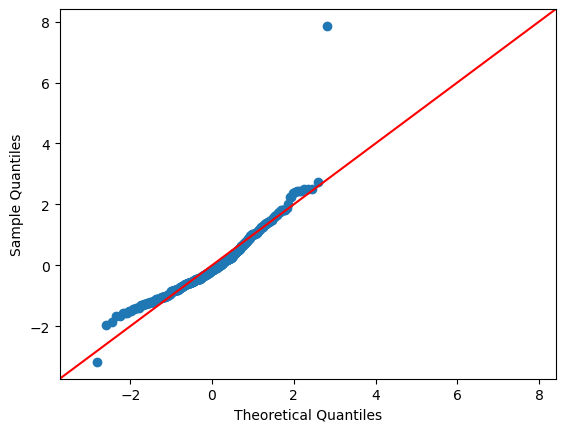

In [48]:
########################################
#Drawing diagnostic plots
## QQplot of residuals
########################################
from statsmodels.api import qqplot
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")
plt.show()



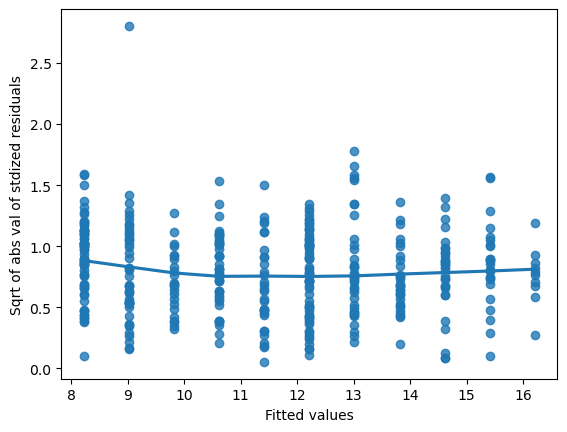

In [49]:
########################################
#Drawing diagnostic plots
## Create the scale-location plot.
########################################
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

#These three diagnostic plots are excellent for sanity-checking the quality of your models.

In [52]:
#########################
#Leverage and Influence
#########################

mdl_price_vs_dist = ols("price_twd_msq ~ dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
display(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

#important concepts for determining whether your model is overly affected by some unusual data points.


,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,sqrt_dist_to_mrt_m,leverage,cooks_dist
270,252.5822,1,0 to 15,35.552194,15.892835,0.003466,0.092948
249,6306.1530,1,15 to 30,4.538578,79.411290,0.043870,0.052859
148,3780.5900,0,15 to 30,13.645991,61.486503,0.013470,0.048675
116,6396.2830,1,30 to 45,3.691377,79.976765,0.045313,0.040168
347,6488.0210,1,15 to 30,3.388805,80.548253,0.046808,0.039480
